# Results visualization for single perturbation

In [ ]:
# imports
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from statsannotator import Annotator

### GEARS

In [147]:
# Import GEARS data
dir = '../cris_test/results/gears_norman_indiv'
hidden_size = 64
decoder_hidden_size = 16
split = 'simulation_single'

# Dataframe for GEARS results
gears_file_template = "gears_norman_split_{split}_seed_{seed}_hidden_size_{hidden_size}_decoder_hidden_size_{decoder_hidden_size}_single_metrics.csv"
seeds = [42, 43, 44]

gears_df = pd.DataFrame()
for seed in seeds:
    file_path = gears_file_template.format(seed=seed, split=split, hidden_size=hidden_size, decoder_hidden_size=decoder_hidden_size)
    file_path = os.path.join(dir, file_path)
    df = pd.read_csv(file_path)
    df['seed'] = seed
    gears_df = pd.concat((gears_df, df))  # Add the DataFrame to the list

In [148]:
# I think splits are done appropriately but just in case
gears_df['split'] = ''

mask_equal = gears_df['split1'] == gears_df['split2']
gears_df.loc[mask_equal, 'split'] = gears_df.loc[mask_equal, 'split1']

mask_split1_unknown = gears_df['split1'] == 'Unknown'
gears_df.loc[mask_split1_unknown, 'split'] = gears_df.loc[mask_split1_unknown, 'split2']

mask_split2_unknown = gears_df['split2'] == 'Unknown'
gears_df.loc[mask_split2_unknown, 'split'] = gears_df.loc[mask_split2_unknown, 'split1']

mask_conflict = ~(mask_equal | mask_split1_unknown | mask_split2_unknown)
for i in gears_df[mask_conflict].index:
    print(f"Different splits for {gears_df.loc[i, 'single']} at seed {gears_df.loc[i, 'seed']}")


In [149]:
gears_df.drop(columns=['split1', 'split2'])

,single,mmd_true_vs_ctrl,mmd_true_vs_pred,mse_true_vs_ctrl,mse_true_vs_pred,kld_true_vs_ctrl,kld_true_vs_pred,PearsonTop100_true_vs_ctrl,Pearson_pval_true_vs_ctrl,PearsonTop100_true_vs_pred,Pearson_pval_true_vs_pred,seed,split
0,FOXA1,0.112754,0.384805,0.068764,0.039017,0.000767,0.001667,0.403465,3.150713e-05,0.640045,7.534342e-13,42,train
1,CDKN1A,0.158587,0.382928,0.069505,0.038601,0.002083,0.001625,0.084902,4.009822e-01,0.859814,2.300836e-30,42,train
2,RUNX1T1,0.094423,0.426726,0.064670,0.038681,0.000285,0.002912,0.510050,5.943169e-08,0.288937,3.551274e-03,42,val
3,HOXC13,0.170187,0.553258,0.083876,0.054801,0.002180,0.002824,0.184858,6.558687e-02,0.890669,2.552300e-35,42,train
4,ZC3HAV1,0.101001,0.372531,0.061679,0.034058,0.000476,0.002064,0.370446,1.483680e-04,0.026051,7.969665e-01,42,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,HOXB9,0.136964,0.414604,0.077360,0.045264,0.001338,0.001173,0.478013,4.917238e-07,0.854883,1.105165e-29,44,train
98,CSRNP1,0.101151,0.237615,0.057923,0.027575,0.000413,0.000590,0.505809,7.961052e-08,0.157324,1.180019e-01,44,val
99,SGK1,0.140452,0.360095,0.073795,0.040540,0.001663,0.001066,0.507415,7.129979e-08,0.893784,6.688140e-36,44,test
100,TBX2,0.154541,0.352115,0.067417,0.037305,0.004390,0.004219,0.124933,2.155369e-01,0.524830,2.079118e-08,44,train


### SENA

In [150]:
# Import SENA data
dir = '../cris_test/results/sena_new_version'

# Dataframe for GEARS results
# "sena_new_version_seed_{seed}_latdim_{latdim}_{pert_type}_metrics.csv"
sena_file_template = "sena_new_version_seed_{seed}_latdim_{latdim}_single_metrics.csv"
seeds = [42, 43, 44]
latdim = 105

sena_df = pd.DataFrame()
for seed in seeds:
    file_path = sena_file_template.format(seed=seed, latdim=latdim)
    file_path = os.path.join(dir, file_path)
    df = pd.read_csv(file_path)
    df['seed'] = seed
    sena_df = pd.concat((sena_df, df))  # Add the DataFrame to the list

In [151]:
sena_df.loc[sena_df['split'] == 'test', 'split'] = 'val'
sena_df

,single,split,mmd_true_vs_ctrl,mmd_true_vs_pred,mse_true_vs_ctrl,mse_true_vs_pred,kld_true_vs_ctrl,kld_true_vs_pred,PearsonTop100_true_vs_pred,Pearson_pval_true_vs_pred,seed
0,AHR,train,0.181474,0.176103,0.079407,0.082312,0.010640,0.008133,0.608731,1.830942e-11,42
1,ARID1A,train,0.256955,0.220652,0.086681,0.090078,0.013862,0.007772,0.607829,1.996997e-11,42
2,ARRDC3,train,0.106286,0.138819,0.069272,0.072840,0.001269,0.002519,0.681065,6.341689e-15,42
3,ATL1,train,0.264435,0.185549,0.082634,0.085101,0.015372,0.005211,0.820067,1.713844e-25,42
4,BAK1,train,0.096739,0.162328,0.063851,0.066423,0.000545,0.003665,-0.136409,1.759667e-01,42
...,...,...,...,...,...,...,...,...,...,...,...
100,ZBTB1,train,0.211170,0.165630,0.075369,0.075015,0.013748,0.004593,0.790388,1.408049e-22,44
101,ZBTB10,train,0.299636,0.302775,0.093349,0.095800,0.022729,0.014584,0.525622,1.962532e-08,44
102,ZBTB25,train,0.145304,0.126337,0.067534,0.065131,0.003974,0.001338,0.748011,3.804682e-19,44
103,ZC3HAV1,train,0.117967,0.194061,0.063732,0.064836,0.001369,0.004320,-0.387523,6.795643e-05,44


### scGPT

In [152]:
# import scGPT data
dir = '../cris_test/results/scgpt'

# Dataframe for GEARS results
scgpt_file_template = "scgpt_norman_alt_simulation_single_seed_{seed}_single_metrics.csv"
seeds = [42]

scgpt_df = pd.DataFrame()
for seed in seeds:
    file_path = scgpt_file_template.format(seed=seed)
    file_path = os.path.join(dir, file_path)
    df = pd.read_csv(file_path)
    df['seed'] = seed
    scgpt_df = pd.concat((scgpt_df, df))  # Add the DataFrame to the list

In [ ]:
# I think splits are done appropriately but just in case
scgpt_df['split'] = ''

mask_equal = scgpt_df['split1'] == scgpt_df['split2']
scgpt_df.loc[mask_equal, 'split'] = scgpt_df.loc[mask_equal, 'split1']

mask_split1_unknown = scgpt_df['split1'] == 'Unknown'
scgpt_df.loc[mask_split1_unknown, 'split'] = scgpt_df.loc[mask_split1_unknown, 'split2']

mask_split2_unknown = scgpt_df['split2'] == 'Unknown'
scgpt_df.loc[mask_split2_unknown, 'split'] = scgpt_df.loc[mask_split2_unknown, 'split1']

mask_conflict = ~(mask_equal | mask_split1_unknown | mask_split2_unknown)
for i in scgpt_df[mask_conflict].index:
    print(f"Different splits for {scgpt_df.loc[i, 'single']} at seed {scgpt_df.loc[i, 'seed']}")

scgpt_df.drop(columns=['split1', 'split2'])
print("Done")

### Some functions

In [11]:
def separate_metric_result(metric_choice, calc_mean: bool = False, split=False, **dataframes, ):

    result = []
    for name, df in dataframes.items():
        if calc_mean:
            df = df.groupby('double', as_index=False).mean(numeric_only=True)
        if any(metric_choice in col for col in df.columns):
            regex_pattern = metric_choice

            filtered_metrics = df.filter(regex=regex_pattern).copy()
            if split:
                joined_df = pd.concat([df.iloc[:, 0], filtered_metrics, df.loc[:, 'split']], axis=1)
            else:
                joined_df = pd.concat([df.iloc[:, 0], filtered_metrics], axis=1)
            joined_df['Tool'] = name
            result.append(joined_df)

    return pd.concat(result, ignore_index=True)

In [12]:
def separate_val_result(metric_choice, **dataframes):

    result = []
    for name, df in dataframes.items():
        df = df.groupby('double', as_index=False).std(numeric_only=True)
        if any(metric_choice in col for col in df.columns):
            regex_pattern = metric_choice

            filtered_metrics = df.filter(regex=regex_pattern).copy()
            joined_df = pd.concat([df.iloc[:, 0], filtered_metrics], axis=1)
            joined_df['Tool'] = name
            result.append(joined_df)
    
    return pd.concat(result, ignore_index=True)

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

def merge_results_and_plot(metric='MSE', order=None, give_title=None, choose_palette=None, annotate=False, **dfs):
    merged = pd.concat(dfs, ignore_index=True)

    # Standardize split labels
    merged.loc[merged['split'] == 'train', 'split'] = 'Train'
    merged.loc[merged['split'] == 'val', 'split'] = 'Validation'
    merged.loc[merged['split'] == 'test', 'split'] = 'OOD'
    merged.loc[merged['split'] == 'Baseline', 'Tool'] = 'Control'

    # Set default order if none provided
    if order is None:
        order = ['Baseline', 'Train', 'Validation', 'OOD']

    # Ensure consistent tool list
    all_tools = sorted(merged['Tool'].unique())
    all_splits = merged['split'].unique()

    # Generate all combinations of Tool x Split
    all_combinations = pd.DataFrame(list(itertools.product(all_tools, order)), columns=['Tool', 'split'])

    # Merge with existing data to fill in missing combinations with NaN
    merged = pd.merge(all_combinations, merged, on=['Tool', 'split'], how='left')

    # Create color palette
    if choose_palette is not None:
        tool_color_dict = choose_palette
    else:
        palette = sns.color_palette("Set1", n_colors=len(all_tools))
        tool_color_dict = dict(zip(all_tools, palette))

    # Plot
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid", color_codes=True)

    sns.barplot(
        data=merged,
        x='split',
        y=metric,
        hue='Tool',
        order=order,
        dodge=True,
        errorbar='sd',
        err_kws={'linewidth': 1.5},
        capsize=0.1,
        palette=tool_color_dict
    )

    if annotate:
        # sig bars
        pairs = [
            (("Baseline", "Control"), ("Train", "GEARS")),
            (("Baseline", "Control"), ("Train", "scGPT")),
            (("Baseline", "Control"), ("Train", "SENA")),
            (("Train", "GEARS"), ("Train", "SENA")),
            (("Train", "GEARS"), ("Train", "scGPT")),
            (("Train", "scGPT"), ("Train", "SENA")),
            (("Validation", "GEARS"), ("Validation", "SENA")),
            (("Validation", "GEARS"), ("Validation", "scGPT")),
            (("Validation", "scGPT"), ("Validation", "SENA")),
            (("OOD", "GEARS"), ("OOD", "scGPT"))
        ]

        annotator = Annotator(
            ax=plt.gca(), pairs=pairs,
            data=merged, x="split", y=metric, hue="Tool",
            order=order, hue_order=all_tools
        )

        annotator.configure(
            test='Mann-Whitney',
            text_format='star',
            loc='inside'
        )
        annotator.apply_and_annotate()

    plt.title(give_title if give_title else 'Summary of metric results')
    plt.tight_layout()
    plt.show()

    return merged


### MSE plot

In [157]:
mse_df = separate_metric_result(metric_choice='mse', calc_mean=False, split=True, GEARS=gears_df, SENA=sena_df, scGPT=scgpt_df)
mse_copy = mse_df.copy()

# Pred
mse_copy = mse_df.copy()
mse_pred = mse_copy.iloc[:, [2, 3, 4]]
mse_pred = mse_pred.rename(columns={"mse_true_vs_pred":'MSE'})

# Ctrl
mse_ctrl = mse_copy.iloc[:, [1, 3, 4]]
mse_ctrl.loc[:, 'split'] = 'Baseline'
mse_ctrl = mse_ctrl.rename(columns={"mse_true_vs_ctrl": 'MSE'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Validation_SENA vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.594e-05 U_stat=1.630e+02
Train_SENA vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:7.394e-22 U_stat=1.072e+04
Train_GEARS vs. Train_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:2.359e-71 U_stat=1.472e+03
Validation_GEARS vs. Validation_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:2.763e-10 U_stat=5.000e+00
Validation_GEARS vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:7.791e-02 U_stat=2.900e+01
OOD_GEARS vs. OOD_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.394e-01 U_stat=4.430e+02
Train_GEARS vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:7.626e-01 U_stat=3.856e+03
Baseline_Control vs. Train_GEARS: Mann-Whitney-Wilcoxon test two-sided, P_val:1.731e-9

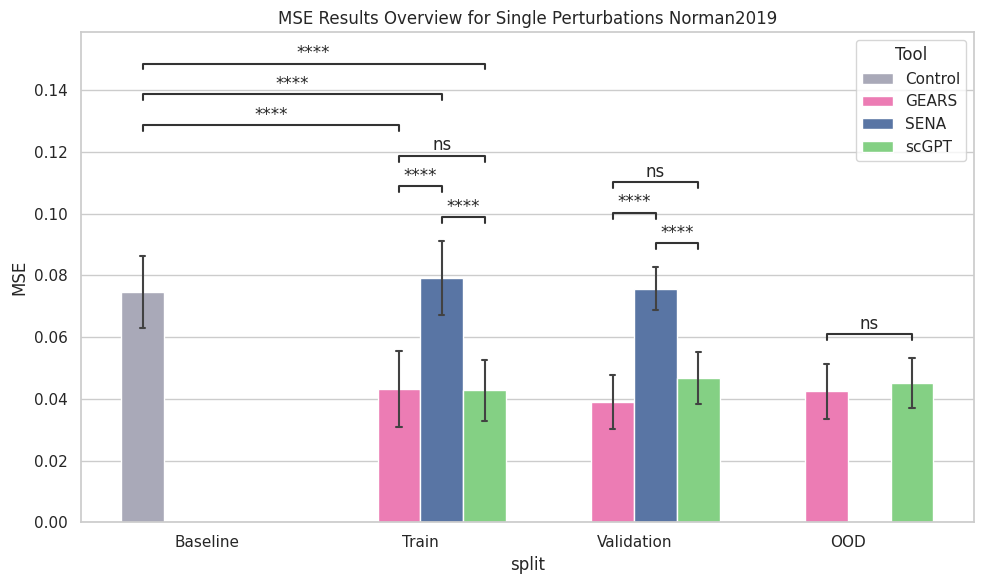

In [158]:
order = ['Baseline', 'Train', 'Validation', 'OOD']
custom_palette = {"Control": "#a7a6ba", "GEARS": "#FF69B4", "scGPT": "#77DD77", "SENA": "#4C72B0"}
mse_merged = merge_results_and_plot(order=order, give_title='MSE Results Overview for Single Perturbations Norman2019', annotate=True, choose_palette=custom_palette, df1=mse_ctrl, df2=mse_pred)

### MMD plot

In [159]:
mmd_df = separate_metric_result(metric_choice='mmd', calc_mean=False, split=True, GEARS=gears_df, SENA=sena_df, scGPT=scgpt_df)
mmd_copy = mmd_df.copy()

# Pred
mmd_copy = mmd_df.copy()
mmd_pred = mmd_copy.iloc[:, [2, 3, 4]]
mmd_pred = mmd_pred.rename(columns={"mmd_true_vs_pred":'MMD'})

# Ctrl
mmd_ctrl = mmd_copy.iloc[:, [1, 3, 4]]
mmd_ctrl.loc[:, 'split'] = 'Baseline'
mmd_ctrl = mmd_ctrl.rename(columns={"mmd_true_vs_ctrl": 'MMD'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Validation_SENA vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.781e-05 U_stat=4.000e+00
Train_SENA vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.691e-16 U_stat=1.021e+03
Train_GEARS vs. Train_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:1.536e-73 U_stat=5.648e+04
Validation_GEARS vs. Validation_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:9.500e-10 U_stat=7.750e+02
Validation_GEARS vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:5.557e-01 U_stat=7.100e+01
OOD_GEARS vs. OOD_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:5.549e-03 U_stat=8.510e+02
Train_GEARS vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.194e-12 U_stat=6.766e+03
Baseline_Control vs. Train_GEARS: Mann-Whitney-Wilcoxon test two-sided, P_val:1.753e-9

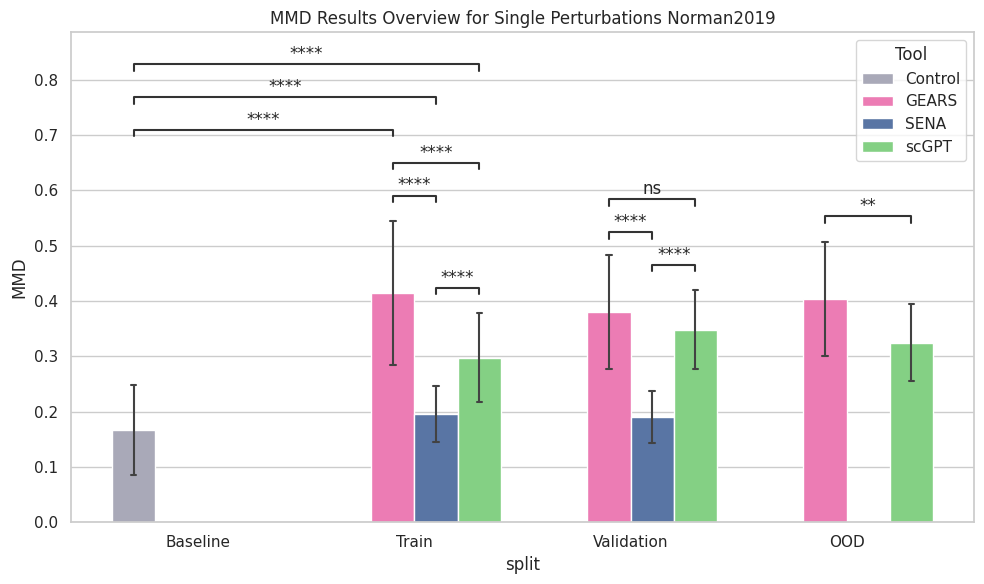

In [160]:
order = ['Baseline', 'Train', 'Validation', 'OOD']
custom_palette = {"Control": "#a7a6ba", "GEARS": "#FF69B4", "scGPT": "#77DD77", "SENA": "#4C72B0"}
mmd_merged = merge_results_and_plot(metric='MMD', order=order, give_title='MMD Results Overview for Single Perturbations Norman2019', annotate=True, choose_palette=custom_palette, df1=mmd_ctrl, df2=mmd_pred)

### Pearson plot

In [161]:
pr_df = separate_metric_result(metric_choice='Pearson', calc_mean=False, split=True, GEARS=gears_df, SENA=sena_df, scGPT=scgpt_df)
pearson_copy = pr_df.copy()


In [162]:
pr_df = separate_metric_result(metric_choice='Pearson', calc_mean=False, split=True, GEARS=gears_df, SENA=sena_df, scGPT=scgpt_df)
pearson_copy = pr_df.copy()

# Pred
pearson_pred = pearson_copy.iloc[:, [3, 5, 6]]
pearson_pred = pearson_pred.rename(columns={"PearsonTop100_true_vs_pred":'PearsonDelta'})

# Ctrl
pearson_ctrl = pearson_copy.iloc[:, [1, 5, 6]]
pearson_ctrl.loc[:, 'split'] = 'Baseline'
pearson_ctrl = pearson_ctrl.rename(columns={"PearsonTop100_true_vs_ctrl": 'PearsonDelta'})

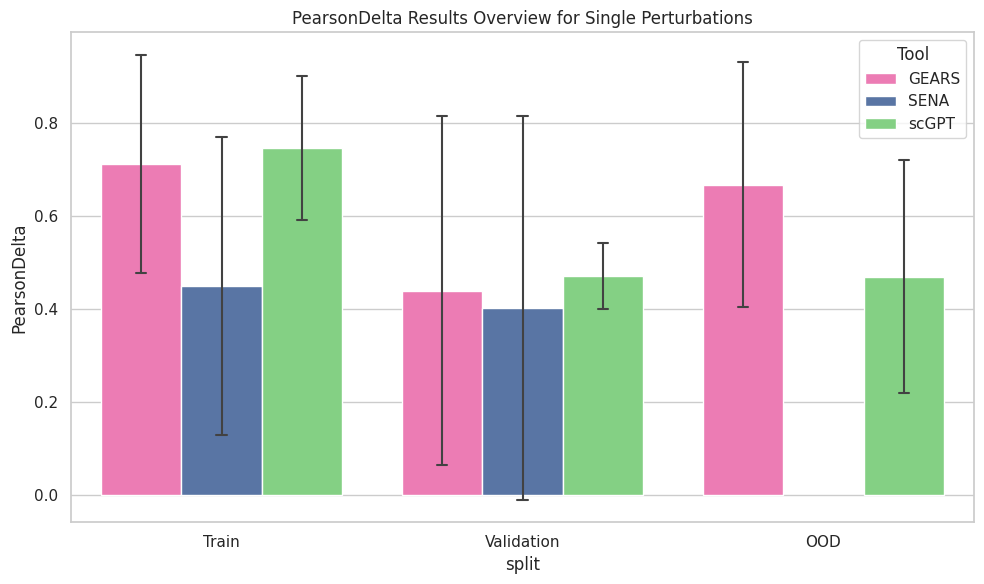

In [163]:
order = ['Train', 'Validation', 'OOD']
custom_palette = {"Control": "#a7a6ba", "GEARS": "#FF69B4", "scGPT": "#77DD77", "SENA": "#4C72B0"}
pearson_merged = merge_results_and_plot(metric='PearsonDelta', annotate=False, order=order, give_title='PearsonDelta Results Overview for Single Perturbations', choose_palette=custom_palette, df1=pearson_pred)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Validation_GEARS vs. Validation_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:8.022e-01 U_stat=4.120e+02
Validation_SENA vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:8.017e-01 U_stat=8.900e+01
Train_GEARS vs. Train_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:7.183e-27 U_stat=4.516e+04
Train_SENA vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.621e-11 U_stat=1.877e+03
Validation_GEARS vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:8.013e-01 U_stat=6.500e+01
OOD_GEARS vs. OOD_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.636e-03 U_stat=8.870e+02
Train_GEARS vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:9.139e-01 U_stat=4.022e+03


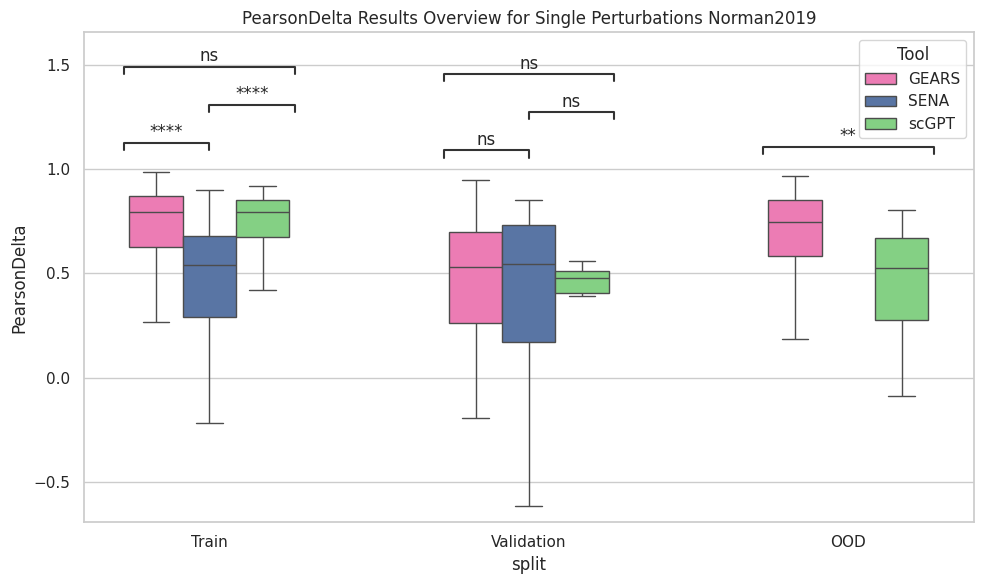

In [165]:
# Treatment order (put Control first)
order = ['Train', 'Validation', 'OOD']
custom_palette = {"Control": "#a7a6ba", "GEARS": "#FF69B4", "scGPT": "#77DD77", "SENA": "#4C72B0"}
# Plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=pearson_pred, x='split', y='PearsonDelta', hue='Tool', order=order, dodge=True, width = 0.5, showfliers=False, palette=custom_palette)


# sig bars
pairs = [
    (("Train", "GEARS"), ("Train", "SENA")),
    (("Train", "GEARS"), ("Train", "scGPT")),
    (("Train", "scGPT"), ("Train", "SENA")),
    (("Validation", "GEARS"), ("Validation", "SENA")),
    (("Validation", "GEARS"), ("Validation", "scGPT")),
    (("Validation", "scGPT"), ("Validation", "SENA")),
    (("OOD", "GEARS"), ("OOD", "scGPT"))
]

annotator = Annotator(
    ax=plt.gca(), pairs=pairs,
    data=pearson_pred, x="split", y='PearsonDelta', hue="Tool",
    order=order
)

annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside'
)
annotator.apply_and_annotate()


plt.title('PearsonDelta Results Overview for Single Perturbations Norman2019')
plt.tight_layout()
plt.show()

## Replogle

### GEARS

In [111]:
# Import GEARS data
dir = '../cris_test/results/gears_replogle_rpe1'
hidden_size = 64
decoder_hidden_size = 16
split = 'simulation_single'

# Dataframe for GEARS results
gears_file_template = "gears_replogle_rpe1_essential_split_{split}_seed_{seed}_hidden_size_{hidden_size}_decoder_hidden_size_{decoder_hidden_size}_single_metrics.csv"
seeds = [42, 43, 44]

gears_df = pd.DataFrame()
for seed in seeds:
    file_path = gears_file_template.format(seed=seed, split=split, hidden_size=hidden_size, decoder_hidden_size=decoder_hidden_size)
    file_path = os.path.join(dir, file_path)
    df = pd.read_csv(file_path)
    df['seed'] = seed
    gears_df = pd.concat((gears_df, df))  # Add the DataFrame to the list

In [114]:
# I think splits are done appropriately but just in case
gears_df['split'] = ''

mask_equal = gears_df['split1'] == gears_df['split2']
gears_df.loc[mask_equal, 'split'] = gears_df.loc[mask_equal, 'split1']

mask_split1_unknown = gears_df['split1'] == 'Unknown'
gears_df.loc[mask_split1_unknown, 'split'] = gears_df.loc[mask_split1_unknown, 'split2']

mask_split2_unknown = gears_df['split2'] == 'Unknown'
gears_df.loc[mask_split2_unknown, 'split'] = gears_df.loc[mask_split2_unknown, 'split1']

mask_conflict = ~(mask_equal | mask_split1_unknown | mask_split2_unknown)
for i in gears_df[mask_conflict].index:
    print(f"Different splits for {gears_df.loc[i, 'single']} at seed {gears_df.loc[i, 'seed']}")

gears_df.drop(columns=['split1', 'split2'])
print("Done")

Done


### SENA

In [115]:
# Import SENA data
dir = '../cris_test/results/sena_new_version'

# Dataframe for GEARS results
# "sena_new_version_seed_{seed}_latdim_{latdim}_{pert_type}_metrics.csv"
sena_file_template = "sena_new_version_seed_{seed}_latdim_{latdim}_single_metrics.csv"
seeds = [42, 43, 44]
latdim = 105

sena_df = pd.DataFrame()
for seed in seeds:
    file_path = sena_file_template.format(seed=seed, latdim=latdim)
    file_path = os.path.join(dir, file_path)
    df = pd.read_csv(file_path)
    df['seed'] = seed
    sena_df = pd.concat((sena_df, df))  # Add the DataFrame to the list

In [116]:
sena_df.loc[sena_df['split'] == 'test', 'split'] = 'val'
sena_df

,single,split,mmd_true_vs_ctrl,mmd_true_vs_pred,mse_true_vs_ctrl,mse_true_vs_pred,kld_true_vs_ctrl,kld_true_vs_pred,PearsonTop100_true_vs_pred,Pearson_pval_true_vs_pred,seed
0,AHR,train,0.181474,0.176103,0.079407,0.082312,0.010640,0.008133,0.608731,1.830942e-11,42
1,ARID1A,train,0.256955,0.220652,0.086681,0.090078,0.013862,0.007772,0.607829,1.996997e-11,42
2,ARRDC3,train,0.106286,0.138819,0.069272,0.072840,0.001269,0.002519,0.681065,6.341689e-15,42
3,ATL1,train,0.264435,0.185549,0.082634,0.085101,0.015372,0.005211,0.820067,1.713844e-25,42
4,BAK1,train,0.096739,0.162328,0.063851,0.066423,0.000545,0.003665,-0.136409,1.759667e-01,42
...,...,...,...,...,...,...,...,...,...,...,...
100,ZBTB1,train,0.211170,0.165630,0.075369,0.075015,0.013748,0.004593,0.790388,1.408049e-22,44
101,ZBTB10,train,0.299636,0.302775,0.093349,0.095800,0.022729,0.014584,0.525622,1.962532e-08,44
102,ZBTB25,train,0.145304,0.126337,0.067534,0.065131,0.003974,0.001338,0.748011,3.804682e-19,44
103,ZC3HAV1,train,0.117967,0.194061,0.063732,0.064836,0.001369,0.004320,-0.387523,6.795643e-05,44


### scGPT

In [117]:
# import scGPT data
dir = '../cris_test/results/scgpt'

# Dataframe for GEARS results
scgpt_file_template = "scgpt_norman_alt_simulation_single_seed_{seed}_single_metrics.csv"
seeds = [42]

scgpt_df = pd.DataFrame()
for seed in seeds:
    file_path = scgpt_file_template.format(seed=seed)
    file_path = os.path.join(dir, file_path)
    df = pd.read_csv(file_path)
    df['seed'] = seed
    scgpt_df = pd.concat((scgpt_df, df))  # Add the DataFrame to the list

In [120]:
# I think splits are done appropriately but just in case
scgpt_df['split'] = ''

mask_equal = scgpt_df['split1'] == scgpt_df['split2']
scgpt_df.loc[mask_equal, 'split'] = scgpt_df.loc[mask_equal, 'split1']

mask_split1_unknown = scgpt_df['split1'] == 'Unknown'
scgpt_df.loc[mask_split1_unknown, 'split'] = scgpt_df.loc[mask_split1_unknown, 'split2']

mask_split2_unknown = scgpt_df['split2'] == 'Unknown'
scgpt_df.loc[mask_split2_unknown, 'split'] = scgpt_df.loc[mask_split2_unknown, 'split1']

mask_conflict = ~(mask_equal | mask_split1_unknown | mask_split2_unknown)
for i in scgpt_df[mask_conflict].index:
    print(f"Different splits for {scgpt_df.loc[i, 'single']} at seed {scgpt_df.loc[i, 'seed']}")

scgpt_df.drop(columns=['split1', 'split2'])
print("Done")

Done


### MSE plot

In [121]:
mse_df = separate_metric_result(metric_choice='mse', calc_mean=False, split=True, GEARS=gears_df, SENA=sena_df, scGPT=scgpt_df)
mse_copy = mse_df.copy()

# Pred
mse_copy = mse_df.copy()
mse_pred = mse_copy.iloc[:, [2, 3, 4]]
mse_pred = mse_pred.rename(columns={"mse_true_vs_pred":'MSE'})

# Ctrl
mse_ctrl = mse_copy.iloc[:, [1, 3, 4]]
mse_ctrl.loc[:, 'split'] = 'Baseline'
mse_ctrl = mse_ctrl.rename(columns={"mse_true_vs_ctrl": 'MSE'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Validation_SENA vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.594e-05 U_stat=1.630e+02
Train_SENA vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:7.394e-22 U_stat=1.072e+04
Train_GEARS vs. Train_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:1.779e-170 U_stat=8.754e+05
Validation_GEARS vs. Validation_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:2.261e-21 U_stat=1.138e+04
Validation_GEARS vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.703e-11 U_stat=1.725e+03
OOD_GEARS vs. OOD_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.707e-11 U_stat=1.728e+04


Train_GEARS vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:6.085e-27 U_stat=1.211e+05
Baseline_Control vs. Train_GEARS: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.429e+07
Baseline_Control vs. Train_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:2.803e-145 U_stat=1.338e+06
Baseline_Control vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:8.163e-27 U_stat=1.936e+05


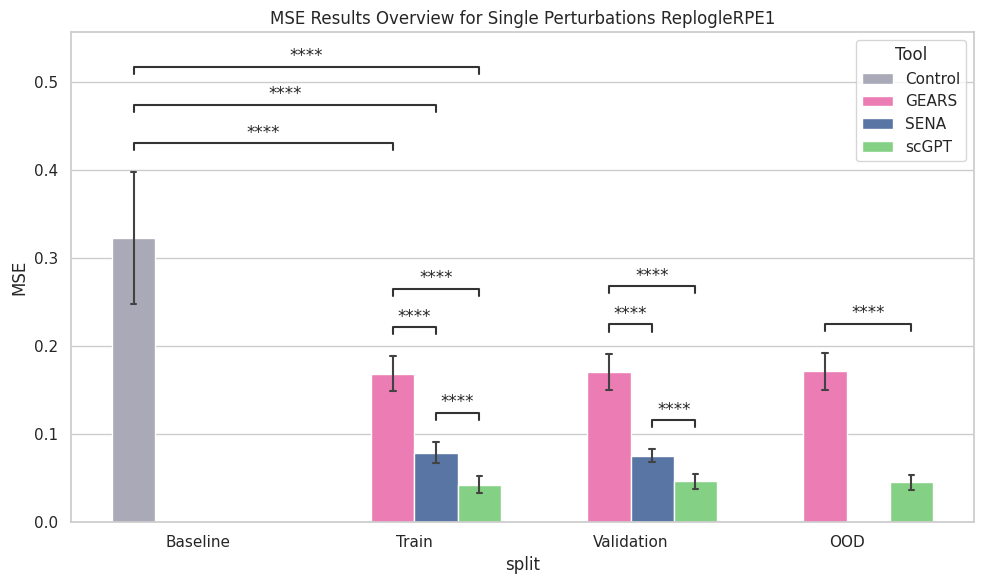

In [123]:
order = ['Baseline', 'Train', 'Validation', 'OOD']
custom_palette = {"Control": "#a7a6ba", "GEARS": "#FF69B4", "scGPT": "#77DD77", "SENA": "#4C72B0"}
mse_merged = merge_results_and_plot(order=order, give_title='MSE Results Overview for Single Perturbations ReplogleRPE1', annotate=True, choose_palette=custom_palette, df1=mse_ctrl, df2=mse_pred)

### MMD plot

In [124]:
mmd_df = separate_metric_result(metric_choice='mmd', calc_mean=False, split=True, GEARS=gears_df, SENA=sena_df, scGPT=scgpt_df)
mmd_copy = mmd_df.copy()

# Pred
mmd_copy = mmd_df.copy()
mmd_pred = mmd_copy.iloc[:, [2, 3, 4]]
mmd_pred = mmd_pred.rename(columns={"mmd_true_vs_pred":'MMD'})

# Ctrl
mmd_ctrl = mmd_copy.iloc[:, [1, 3, 4]]
mmd_ctrl.loc[:, 'split'] = 'Baseline'
mmd_ctrl = mmd_ctrl.rename(columns={"mmd_true_vs_ctrl": 'MMD'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Validation_SENA vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.781e-05 U_stat=4.000e+00
Train_SENA vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.691e-16 U_stat=1.021e+03
Train_GEARS vs. Train_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:3.745e-157 U_stat=8.577e+05
Validation_GEARS vs. Validation_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:1.853e-20 U_stat=1.125e+04
Validation_GEARS vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:8.339e-02 U_stat=1.252e+03
OOD_GEARS vs. OOD_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.194e-04 U_stat=1.363e+04
Train_GEARS vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:6.608e-14 U_stat=1.028e+05
Baseline_Control vs. Train_GEARS: Mann-Whitney-Wilcoxon test two-sided, P_val:3.980e-

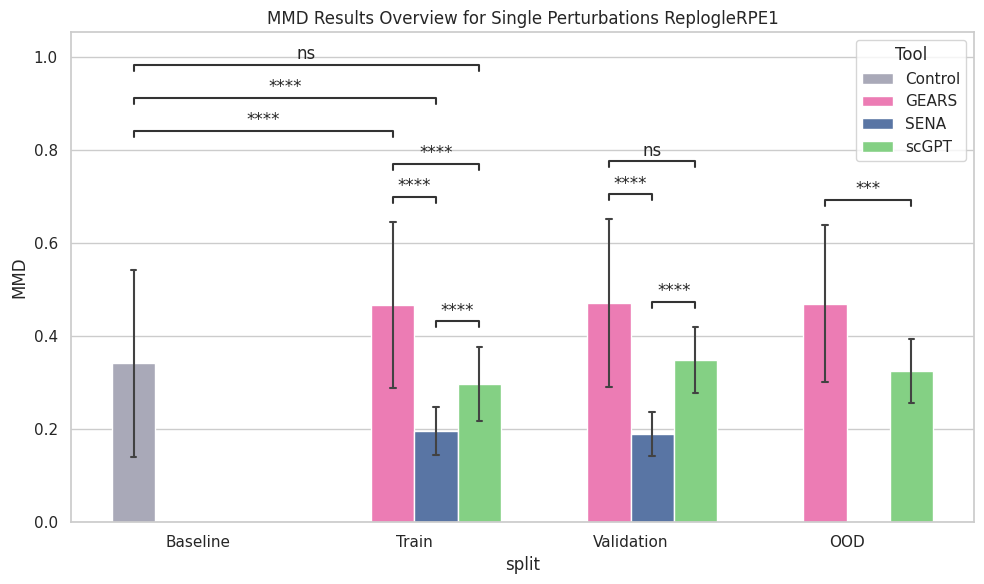

In [125]:
order = ['Baseline', 'Train', 'Validation', 'OOD']
custom_palette = {"Control": "#a7a6ba", "GEARS": "#FF69B4", "scGPT": "#77DD77", "SENA": "#4C72B0"}
mmd_merged = merge_results_and_plot(metric='MMD', order=order, give_title='MMD Results Overview for Single Perturbations ReplogleRPE1', annotate=True, choose_palette=custom_palette, df1=mmd_ctrl, df2=mmd_pred)

### Pearson plot

In [131]:
pr_df = separate_metric_result(metric_choice='Pearson', calc_mean=False, split=True, GEARS=gears_df, SENA=sena_df, scGPT=scgpt_df)
pearson_copy = pr_df.copy()

# Pred
pearson_pred = pearson_copy.iloc[:, [3, 5, 6]]
pearson_pred = pearson_pred.rename(columns={"PearsonTop100_true_vs_pred":'PearsonDelta'})

# Ctrl
pearson_ctrl = pearson_copy.iloc[:, [1, 5, 6]]
pearson_ctrl.loc[:, 'split'] = 'Baseline'
pearson_ctrl = pearson_ctrl.rename(columns={"PearsonTop100_true_vs_ctrl": 'PearsonDelta'})

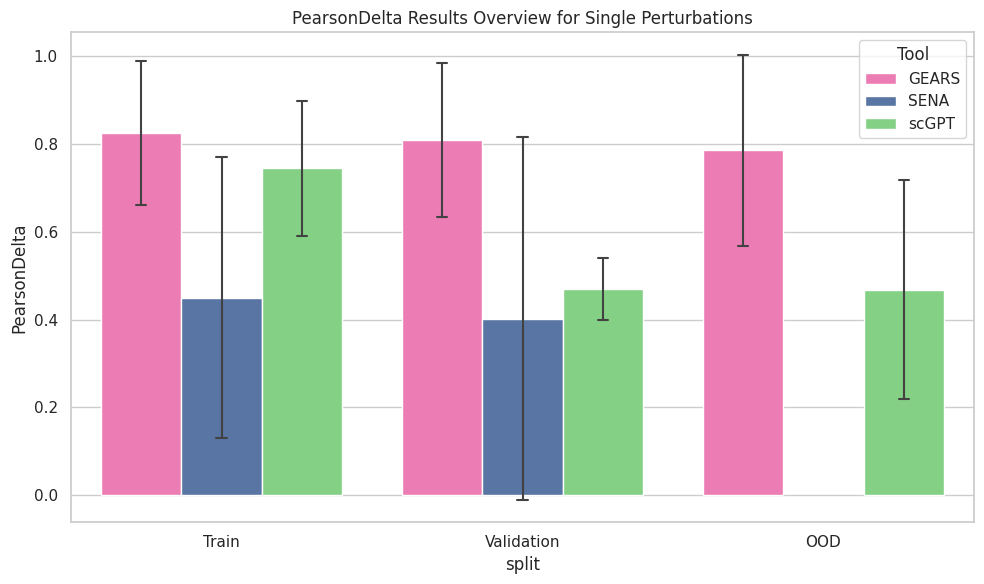

In [143]:
order = ['Train', 'Validation', 'OOD']
custom_palette = {"Control": "#a7a6ba", "GEARS": "#FF69B4", "scGPT": "#77DD77", "SENA": "#4C72B0"}
pearson_merged = merge_results_and_plot(metric='PearsonDelta', annotate=False, order=order, give_title='PearsonDelta Results Overview for Single Perturbations', choose_palette=custom_palette, df1=pearson_pred)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Validation_GEARS vs. Validation_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:2.576e-12 U_stat=9.890e+03
Validation_SENA vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:8.017e-01 U_stat=8.900e+01
Train_GEARS vs. Train_SENA: Mann-Whitney-Wilcoxon test two-sided, P_val:7.952e-105 U_stat=7.797e+05
Train_SENA vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:2.621e-11 U_stat=1.877e+03
Validation_GEARS vs. Validation_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:1.256e-04 U_stat=1.602e+03
OOD_GEARS vs. OOD_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:7.941e-07 U_stat=1.504e+04
Train_GEARS vs. Train_scGPT: Mann-Whitney-Wilcoxon test two-sided, P_val:7.479e-06 U_stat=8.578e+04


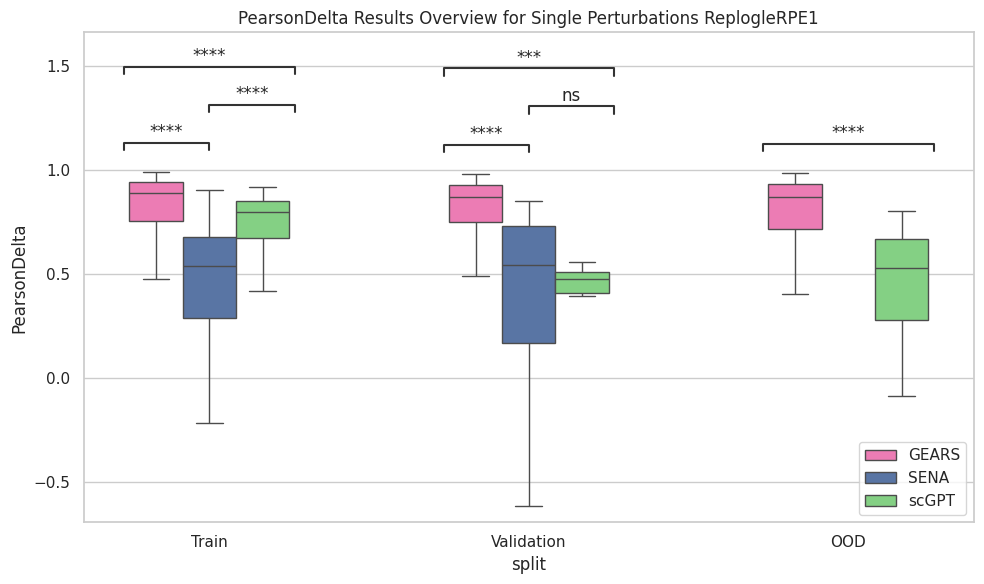

In [146]:
# Treatment order (put Control first)
order = ['Train', 'Validation', 'OOD']
custom_palette = {"Control": "#a7a6ba", "GEARS": "#FF69B4", "scGPT": "#77DD77", "SENA": "#4C72B0"}
# Plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", color_codes=True)

sns.boxplot(
    data=pearson_pred,
    x='split',
    y='PearsonDelta',
    hue='Tool',
    order=order,
    dodge=True,
    width=0.5,
    showfliers=False,
    palette=custom_palette
)


# sig bars
pairs = [
    (("Train", "GEARS"), ("Train", "SENA")),
    (("Train", "GEARS"), ("Train", "scGPT")),
    (("Train", "scGPT"), ("Train", "SENA")),
    (("Validation", "GEARS"), ("Validation", "SENA")),
    (("Validation", "GEARS"), ("Validation", "scGPT")),
    (("Validation", "scGPT"), ("Validation", "SENA")),
    (("OOD", "GEARS"), ("OOD", "scGPT"))
]

annotator = Annotator(
    ax=plt.gca(), pairs=pairs,
    data=pearson_pred, x="split", y='PearsonDelta', hue="Tool",
    order=order
)

annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside'
)
annotator.apply_and_annotate()


plt.title('PearsonDelta Results Overview for Single Perturbations ReplogleRPE1')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()